<a href="https://colab.research.google.com/github/cml096/GoogleColabRepo/blob/master/cristobal/Data-02/Rendimiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_excel('OperTot - PowerView_ARCH1.xlsx')

In [2]:
list_drop = ['ID','shiftindex','crew#','unit#','tmcat08','tmcat09','tmcat10','tmcat11','tmcat12','tmcat13','tmcat14','tmcat15','tmcat16','tmcat17','tmcat18','tmcat19']
df.drop(list_drop,axis=1,inplace=True)

In [3]:
df["shift#"] = df["shift#"].astype(str)
df.totaltons = df.totaltons.astype(int)

In [4]:
df_loads = df[(df.unit == 'Camion') | (df.unit == 'Pala')]

#Rendimiento Efectivo

\begin{equation}
\mathrm{Rendimiento_{(efectivo)}}[tps] = \frac{Tonelaje}{Segundos Efectivas del Equipo}
\end{equation}

In [32]:
def rendimiento_efectivo(ton,time):
  if time == 0:
    return 0
  else:
    if ton/time > 1.306:
      print(f'toneladas = {ton} ; tiempo efectivo = {time} ; Rendimiento : {ton/time}')
    return ton/time

In [33]:
df_loads.columns

Index(['shiftdate', 'shift#', 'start', 'crew', 'eqmtid', 'logintime', 'locid',
       'operid', 'totaltime', 'pit', 'unit', 'totalloads', 'totaltons',
       'loadtime', 'idletime', 'spottime', 'loadcnt', 'tmcat00', 'tmcat01',
       'tmcat02', 'tmcat03', 'tmcat04', 'tmcat05', 'tmcat06', 'tmcat07',
       'rendimiento_efectivo', 'rendimiento_operativo'],
      dtype='object')

In [34]:
df_loads['rendimiento_efectivo'] = df_loads.apply(lambda row : rendimiento_efectivo(row.totaltons,row.tmcat01),axis=1)

toneladas = 460 ; tiempo efectivo = 11 ; Rendimiento : 41.81818181818182
toneladas = 460 ; tiempo efectivo = 55 ; Rendimiento : 8.363636363636363
toneladas = 230 ; tiempo efectivo = 28 ; Rendimiento : 8.214285714285714
toneladas = 240 ; tiempo efectivo = 181 ; Rendimiento : 1.3259668508287292
toneladas = 230 ; tiempo efectivo = 12 ; Rendimiento : 19.166666666666668
toneladas = 46614 ; tiempo efectivo = 33411 ; Rendimiento : 1.395169255634372
toneladas = 25116 ; tiempo efectivo = 19101 ; Rendimiento : 1.3149049787969216
toneladas = 442 ; tiempo efectivo = 332 ; Rendimiento : 1.3313253012048192
toneladas = 244 ; tiempo efectivo = 89 ; Rendimiento : 2.741573033707865
toneladas = 460 ; tiempo efectivo = 7 ; Rendimiento : 65.71428571428571
toneladas = 21975 ; tiempo efectivo = 16321 ; Rendimiento : 1.346424851418418
toneladas = 28684 ; tiempo efectivo = 21882 ; Rendimiento : 1.3108490997166622
toneladas = 224 ; tiempo efectivo = 42 ; Rendimiento : 5.333333333333333
toneladas = 14952 ; tiemp

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df_loads[['totaltons','tmcat01','rendimiento_efectivo']].describe()

,totaltons,tmcat01,rendimiento_efectivo
count,82583.000000,82583.000000,82583.000000
mean,1507.564172,7369.720790,0.157085
std,3601.060553,12324.977788,5.577645
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1823.500000,10971.000000,0.115559
max,50616.000000,65079.000000,1150.000000


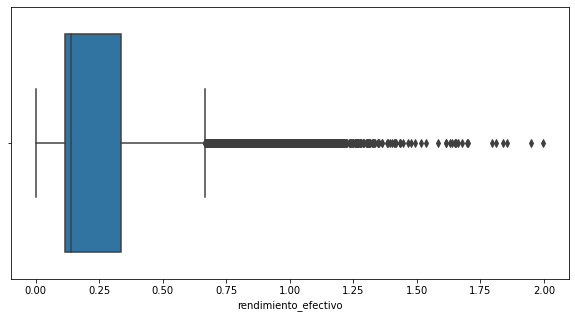

In [10]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df_loads.rendimiento_efectivo[ (df_loads.rendimiento_efectivo != 0) & (df_loads.rendimiento_efectivo < 2) ])

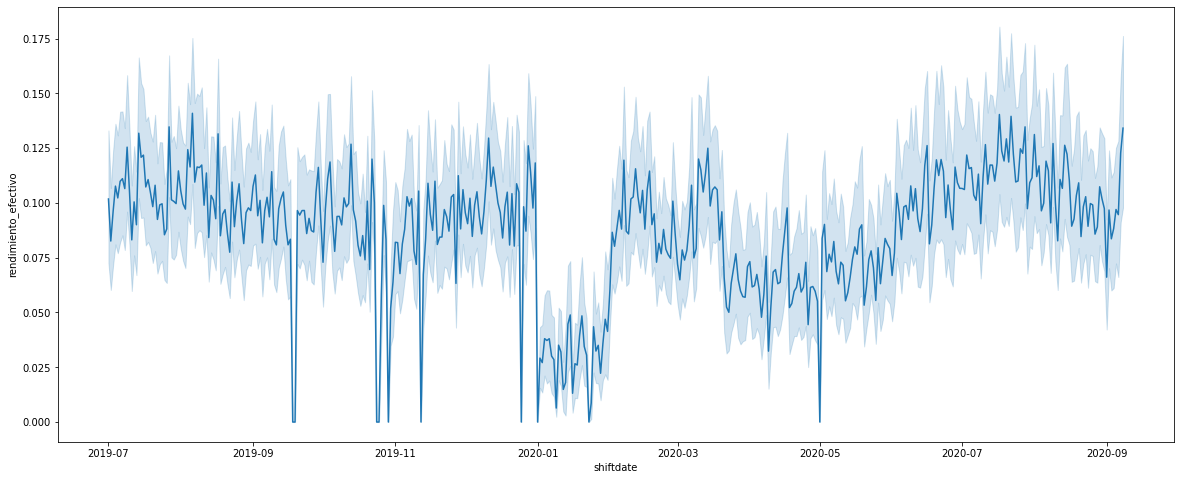

In [35]:
plt.figure(figsize=(20,8))
sns.lineplot(x="shiftdate", y="rendimiento_efectivo",data=df_loads[df_loads.rendimiento_efectivo < 2])

# Rendimiento Operativo

\begin{equation}
\mathrm{Tiempo_{(operativo)}} = \mathrm{Tiempo_{(efectivo)}} + \mathrm{Tiempo_{(no productivo)}}
\end{equation}

In [12]:
def tiempo_operativo(time_1,time_2):
  return time_1+time_2

\begin{equation}
\mathrm{Rendimiento_{(operativo)}}[tps] = \frac{Tonelaje}{Segundos Operativos del Equipo}
\end{equation}

In [30]:
def rendimiento_efectivo(ton,time_1,time_2):
  time = tiempo_operativo(time_1,time_2)
  if time == 0:
    return 0
  else:
    if ton/time > 1.306:
      print(f'toneladas = {ton} ; tiempo operativo = {time} ; Rendimiento : {ton/time}')
    return ton/time

In [31]:
df_loads['rendimiento_operativo'] = df_loads.apply(lambda row : rendimiento_efectivo(row.totaltons,row.tmcat01,row.tmcat02),axis=1)

toneladas = 460 ; tiempo operativo = 11 ; Rendimiento : 41.81818181818182
toneladas = 460 ; tiempo operativo = 55 ; Rendimiento : 8.363636363636363
toneladas = 230 ; tiempo operativo = 28 ; Rendimiento : 8.214285714285714
toneladas = 240 ; tiempo operativo = 181 ; Rendimiento : 1.3259668508287292
toneladas = 230 ; tiempo operativo = 12 ; Rendimiento : 19.166666666666668
toneladas = 46614 ; tiempo operativo = 33411 ; Rendimiento : 1.395169255634372
toneladas = 25116 ; tiempo operativo = 19101 ; Rendimiento : 1.3149049787969216
toneladas = 442 ; tiempo operativo = 332 ; Rendimiento : 1.3313253012048192
toneladas = 244 ; tiempo operativo = 89 ; Rendimiento : 2.741573033707865
toneladas = 460 ; tiempo operativo = 7 ; Rendimiento : 65.71428571428571
toneladas = 21975 ; tiempo operativo = 16321 ; Rendimiento : 1.346424851418418
toneladas = 28684 ; tiempo operativo = 21882 ; Rendimiento : 1.3108490997166622
toneladas = 224 ; tiempo operativo = 42 ; Rendimiento : 5.333333333333333
toneladas = 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
df_loads[['totaltons','tmcat01','tmcat02','rendimiento_operativo']].describe()

,totaltons,tmcat01,tmcat02,rendimiento_operativo
count,82583.000000,82583.000000,82583.000000,82583.000000
mean,1507.564172,7369.720790,0.263468,0.157082
std,3601.060553,12324.977788,48.451121,5.577644
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,1823.500000,10971.000000,0.000000,0.115559
max,50616.000000,65079.000000,10796.000000,1150.000000


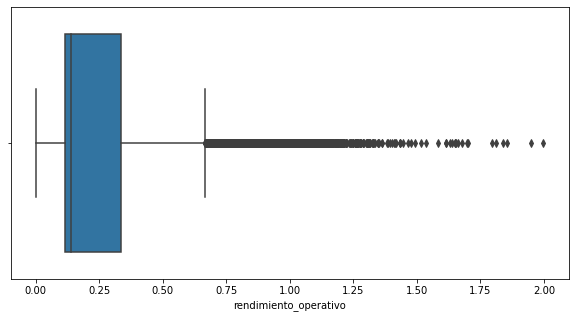

In [16]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df_loads.rendimiento_operativo[ (df_loads.rendimiento_operativo != 0) & (df_loads.rendimiento_operativo < 2) ])

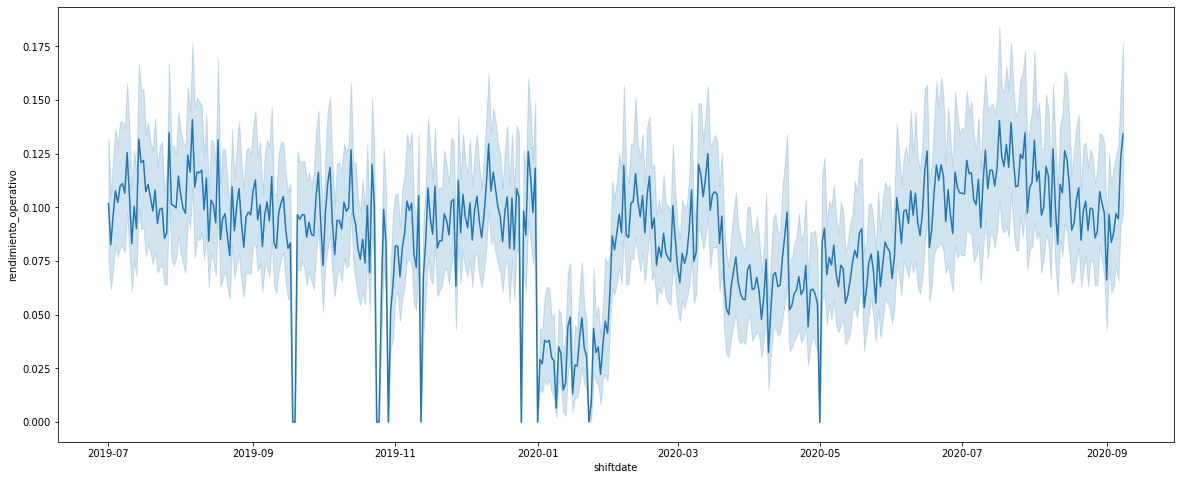

In [36]:
plt.figure(figsize=(20,8))
sns.lineplot(x="shiftdate", y="rendimiento_operativo",data=df_loads[df_loads.rendimiento_operativo < 2])

#Pomedio Palas Hidraúlicas 

In [40]:
df_palas = df_loads[(df_loads.unit == "Pala") | (df_loads.tmcat01 != 0)]

\begin{equation}
Promedio nacional = 
\mathrm{0,861_{(toneladas por segundo)}}
\end{equation}

In [41]:
def check(valor):
  if valor >= 0.861:
    return 1
  else:
    return 0

In [42]:
df_palas['rend_ef_bin'] = df_palas.apply(lambda row : check(row.rendimiento_efectivo),axis=1)
df_palas['rend_op_bin'] = df_palas.apply(lambda row : check(row.rendimiento_operativo),axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [43]:
df_palas.columns

Index(['shiftdate', 'shift#', 'start', 'crew', 'eqmtid', 'logintime', 'locid',
       'operid', 'totaltime', 'pit', 'unit', 'totalloads', 'totaltons',
       'loadtime', 'idletime', 'spottime', 'loadcnt', 'tmcat00', 'tmcat01',
       'tmcat02', 'tmcat03', 'tmcat04', 'tmcat05', 'tmcat06', 'tmcat07',
       'rendimiento_efectivo', 'rendimiento_operativo', 'rend_ef_bin',
       'rend_op_bin'],
      dtype='object')

In [46]:
df_palas.describe()

,start,logintime,totaltime,totalloads,totaltons,loadtime,idletime,spottime,loadcnt,tmcat00,tmcat01,tmcat02,tmcat03,tmcat04,tmcat05,tmcat06,tmcat07,rendimiento_efectivo,rendimiento_operativo,rend_ef_bin,rend_op_bin
count,52561.000000,52561.000000,52561.000000,52561.000000,52561.000000,52561.000000,52561.000000,52561.000000,52561.000000,52561.000000,52561.000000,52561.000000,52561.000000,52561.000000,52561.000000,52561.000000,52561.000000,52561.000000,52561.000000,52561.000000,52561.000000
mean,7783.139590,7644.013052,22680.488670,10.262723,2365.216301,2058.796256,1937.594757,575.438100,10.262723,22680.488670,11579.187078,0.413957,682.071688,5038.850783,1440.137593,3451.791328,489.356291,0.246809,0.246805,0.028500,0.028500
std,21698.956401,12126.731378,17629.904359,18.575388,4283.223292,3562.835681,4985.616904,1141.245389,18.575388,17629.904359,13781.485646,60.731664,1396.388455,11716.033593,6721.412462,9475.766675,4230.572145,6.989844,6.989843,0.166399,0.166399
min,-14400.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-14400.000000,0.000000,3958.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3958.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,28800.000000,662.000000,21141.000000,2.000000,460.000000,350.000000,248.000000,64.000000,2.000000,21141.000000,3990.000000,0.000000,195.000000,0.000000,0.000000,0.000000,0.000000,0.092327,0.092327,0.000000,0.000000
75%,28800.000000,11741.000000,42707.000000,15.000000,3547.000000,2927.000000,1816.000000,812.000000,15.000000,42707.000000,22112.000000,0.000000,909.000000,2474.000000,1.000000,3580.000000,0.000000,0.144112,0.144112,0.000000,0.000000
max,72000.000000,43195.000000,43200.000000,232.000000,50616.000000,37191.000000,43200.000000,65532.000000,232.000000,43200.000000,65079.000000,10796.000000,43200.000000,43200.000000,43200.000000,43200.000000,43200.000000,1150.000000,1150.000000,1.000000,1.000000


Cumple!

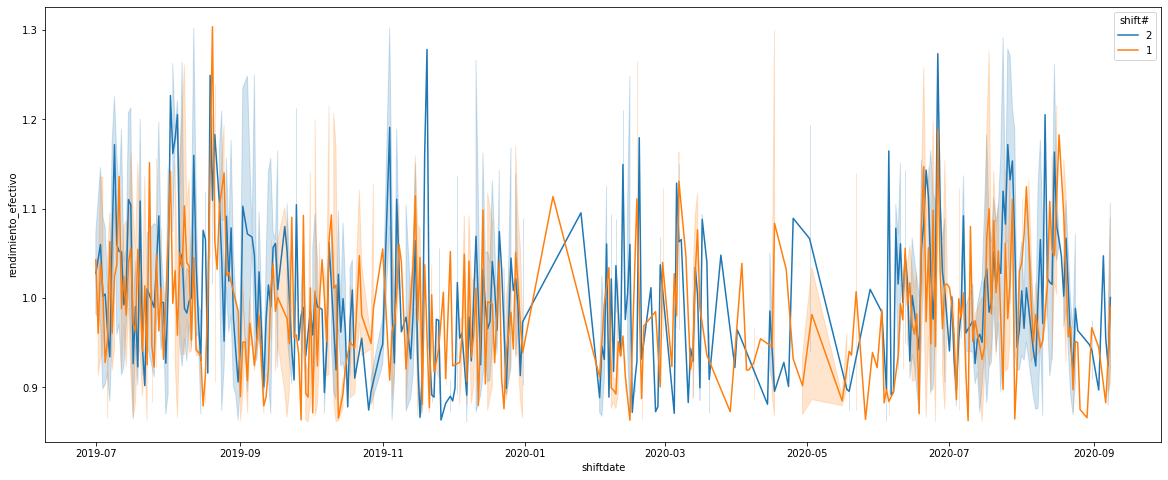

In [49]:
plt.figure(figsize=(20,8))

sns.lineplot(x="shiftdate", y="rendimiento_efectivo",
             hue="shift#",
             data=df_palas[(df_palas.rendimiento_efectivo < 1.306) & (df_palas.rend_ef_bin == 1)])

No Cumple

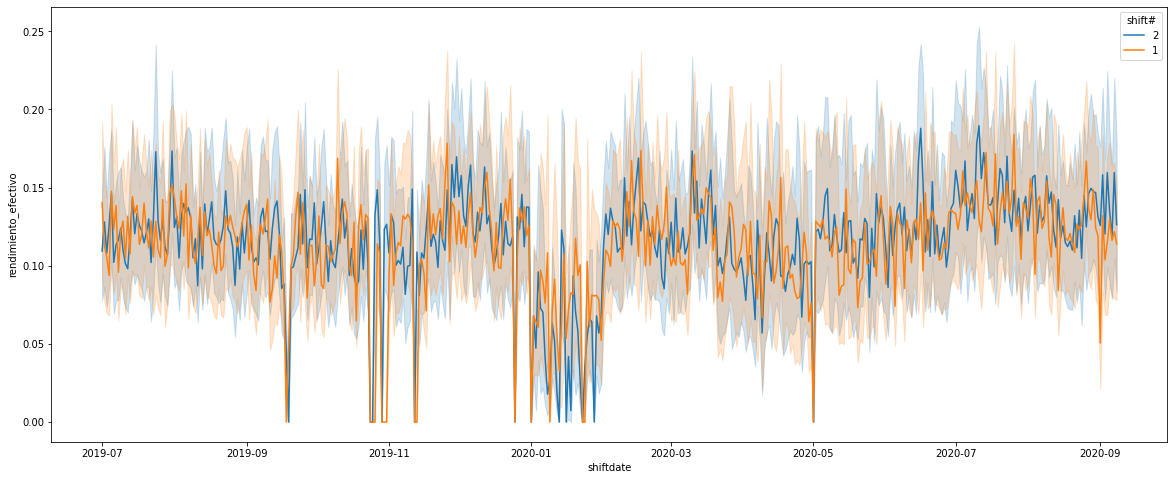

In [50]:
plt.figure(figsize=(20,8))

sns.lineplot(x="shiftdate", y="rendimiento_efectivo",
             hue="shift#",
             data=df_palas[(df_palas.rendimiento_efectivo < 1.306) & (df_palas.rend_ef_bin == 0)])

Lo mas alto son
\begin{equation}
\mathrm{0.25_{(t/segundo)}}
=
\mathrm{900_{(t/hora)}}
\end{equation}

#Regresión logística